In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns
from sklearn.datasets import load_boston


In [2]:
boston = load_boston()
bos = pd.DataFrame(boston.data,columns=boston.feature_names)
bos.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [3]:
bos['Price']=boston.target
bos.head()


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [4]:
#check whether any quatity contain NULL value
bos.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
Price      0
dtype: int64

In [5]:
bos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null float64
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null float64
TAX        506 non-null float64
PTRATIO    506 non-null float64
B          506 non-null float64
LSTAT      506 non-null float64
Price      506 non-null float64
dtypes: float64(14)
memory usage: 55.4 KB


C:\Users\user\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


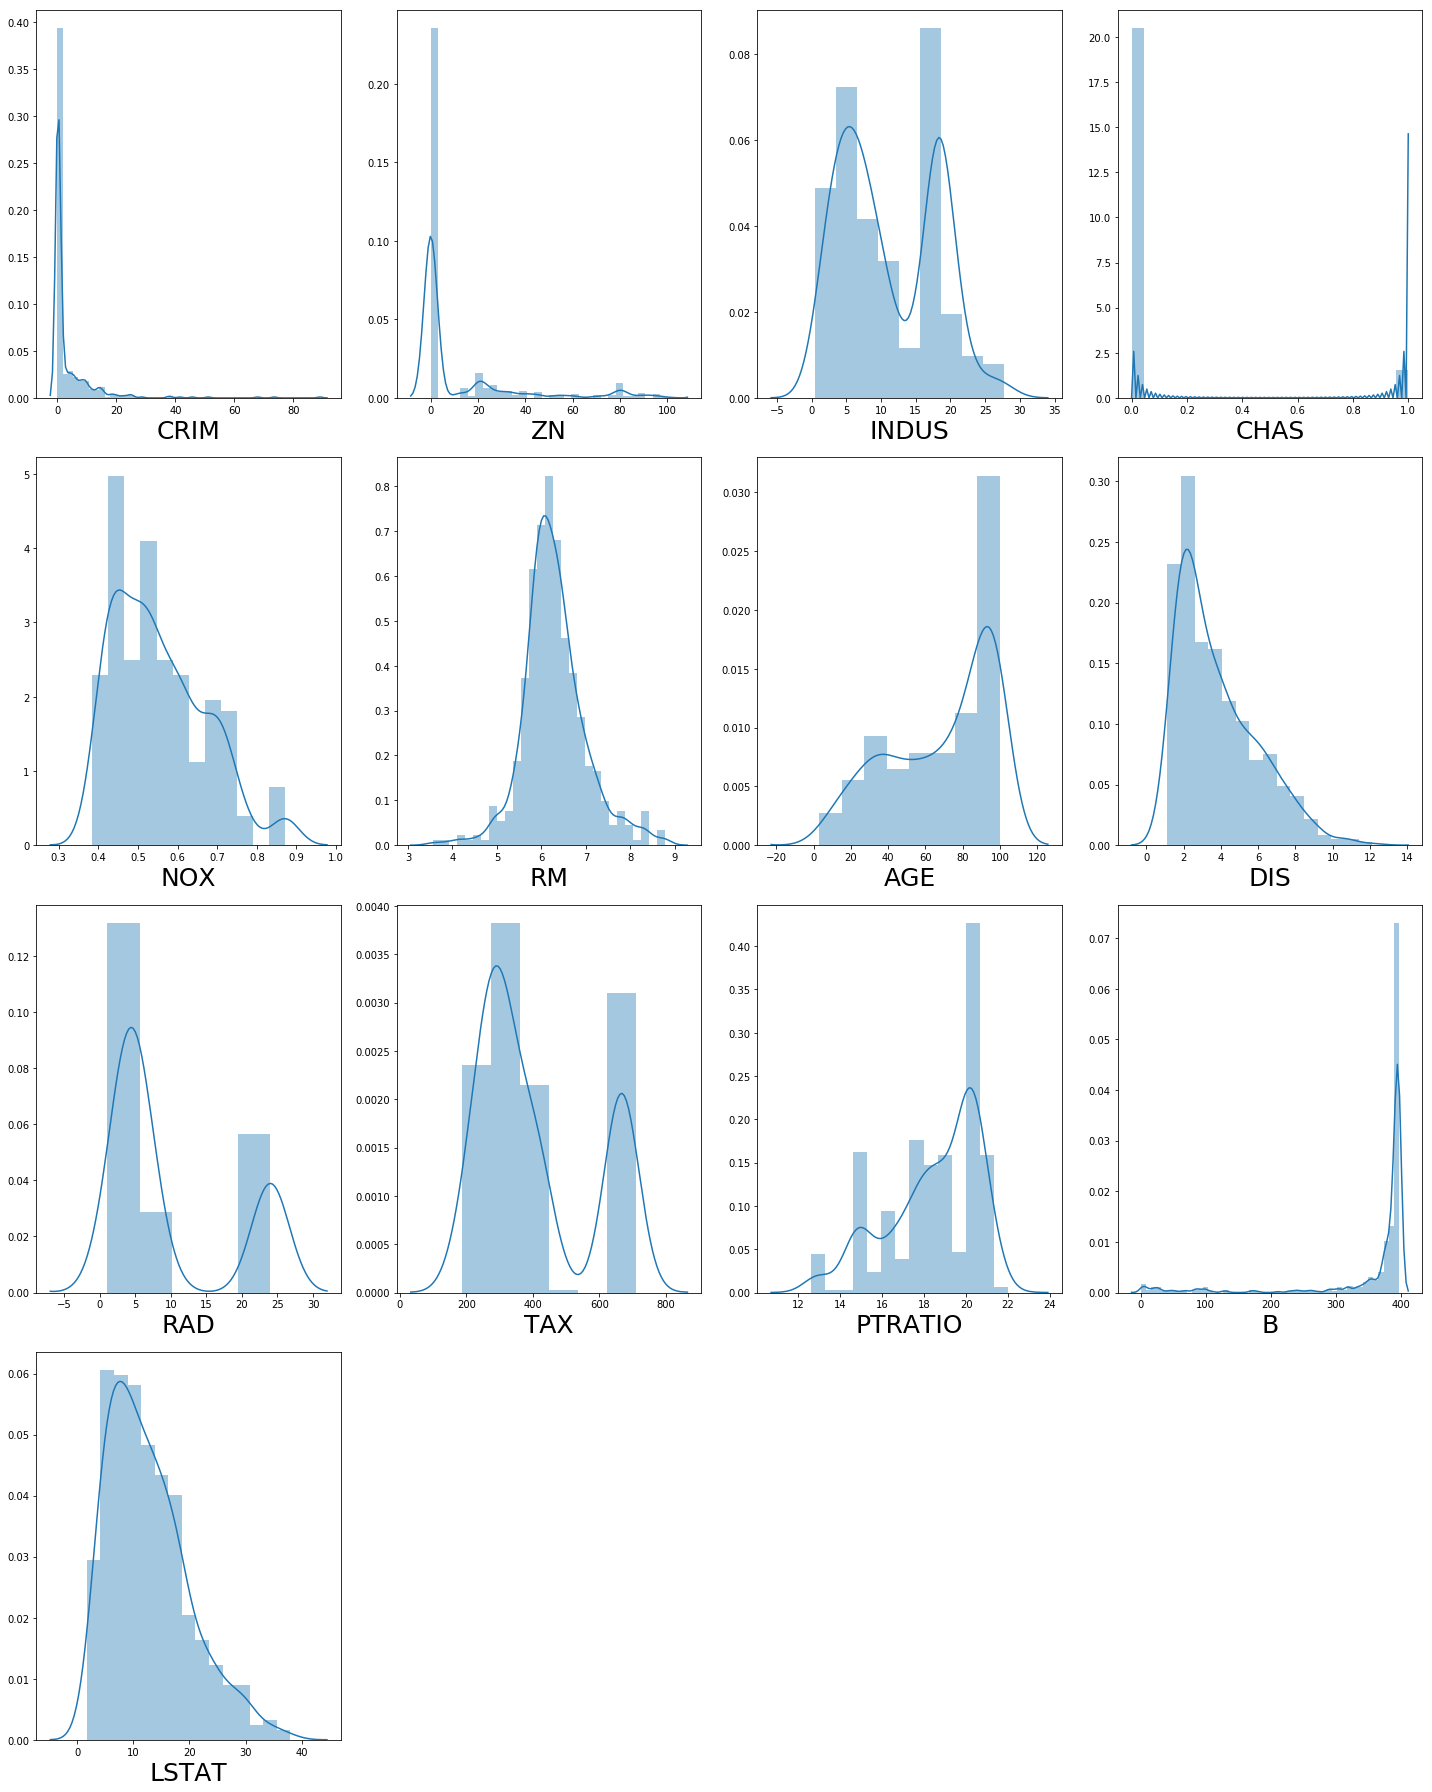

In [6]:
plt.figure(figsize=(20,25))
plotnumber=1
for i in bos.columns:
    if plotnumber<=13:
        ax=plt.subplot(4,4,plotnumber)
        sns.distplot(bos[i])
        plt.xlabel(i,fontsize=25)
    plotnumber+=1
plt.tight_layout()

In [7]:
temp=bos.drop(['Price'],axis=1)

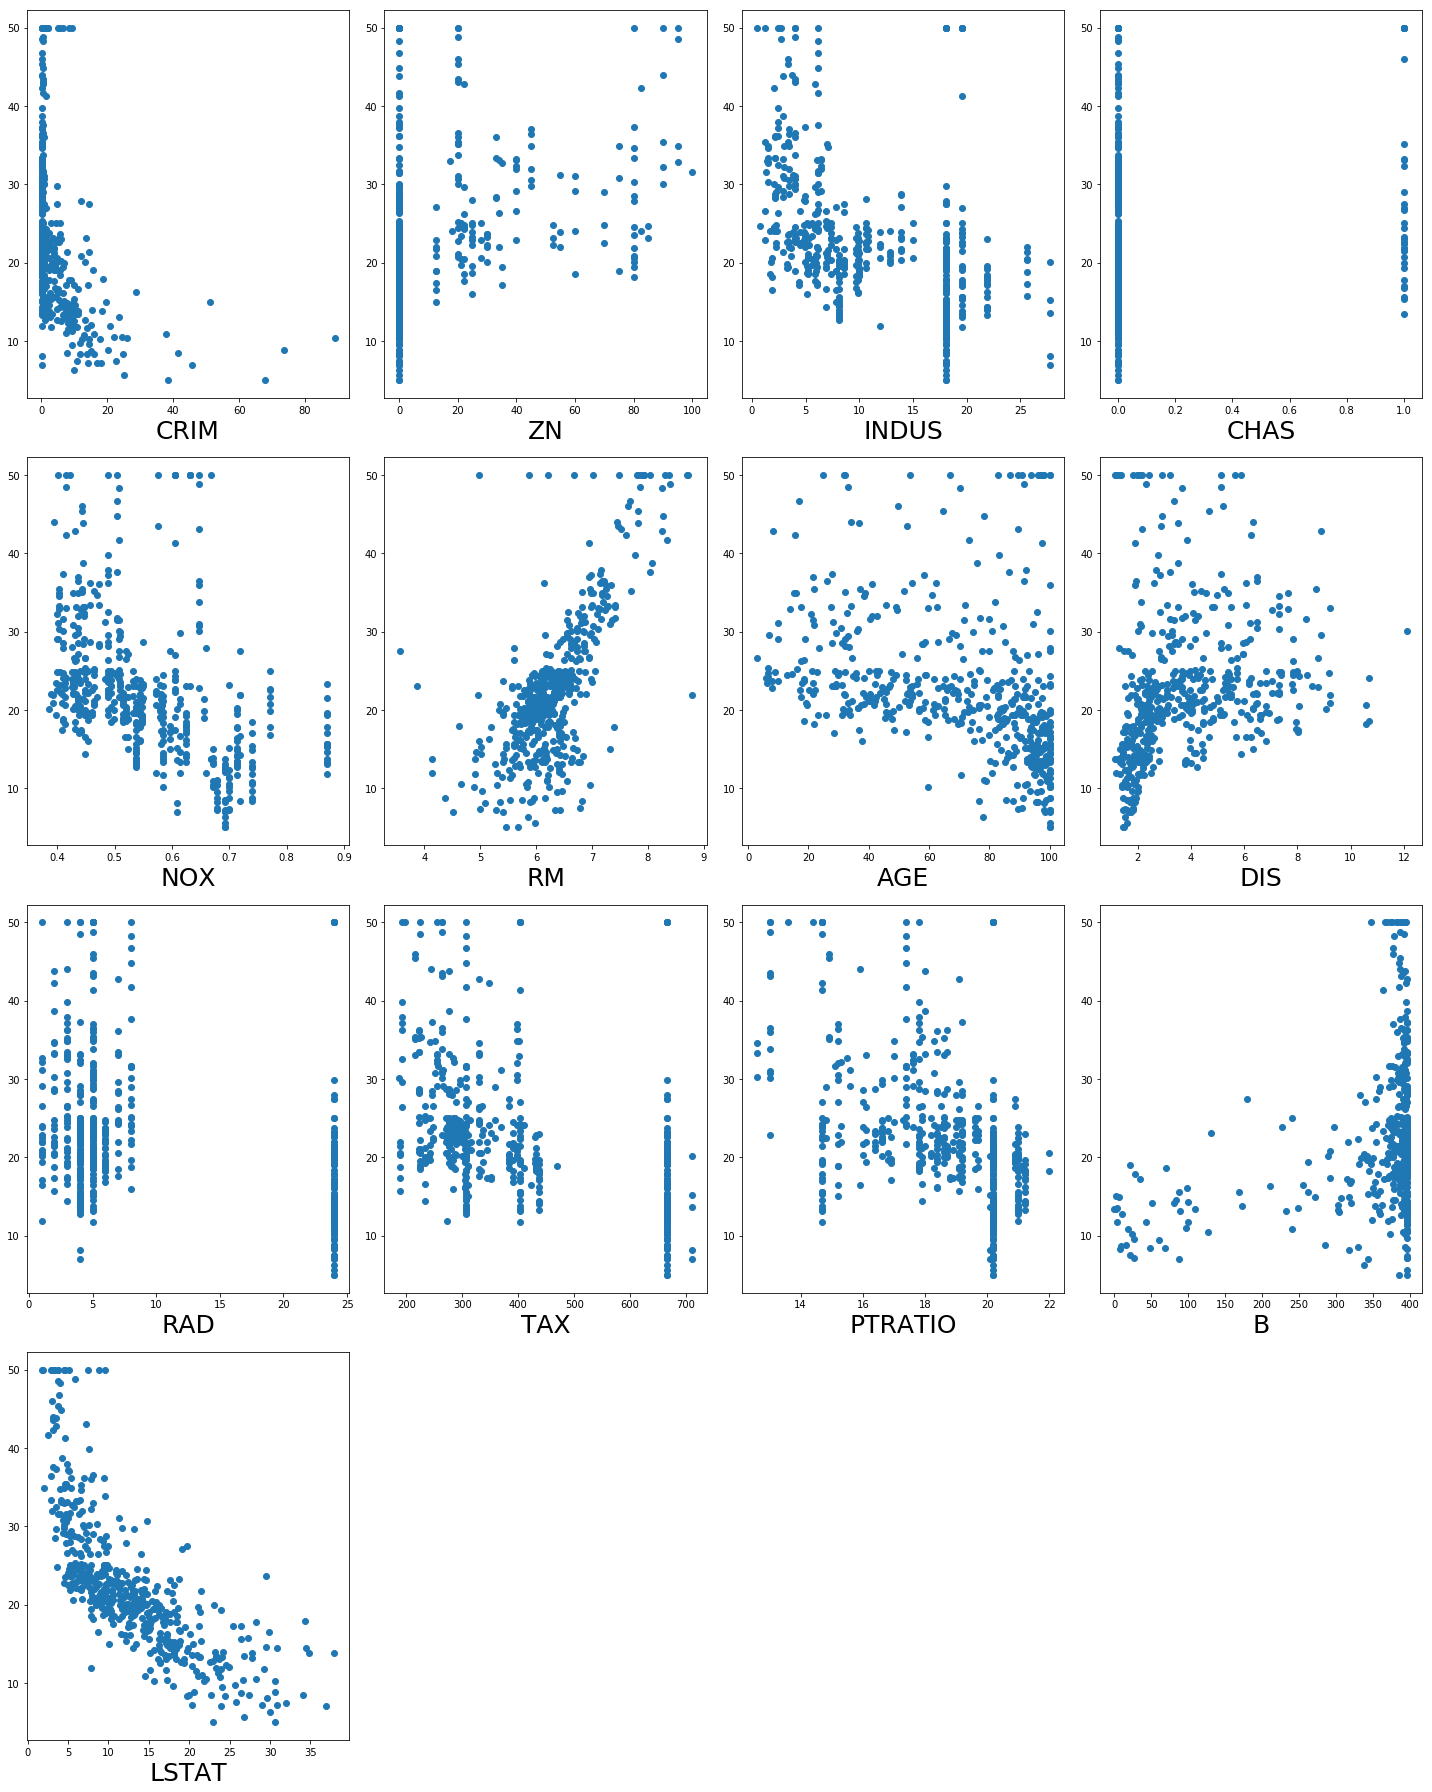

In [10]:
plt.figure(figsize=(20,25))
plotnumber=1
for i in temp.columns:
    if plotnumber<=13:
        ax=plt.subplot(4,4,plotnumber)
        plt.scatter(temp[i],bos.Price)
        plt.xlabel(i,fontsize=25)
    plotnumber+=1
plt.tight_layout()

In [9]:
from sklearn.model_selection import train_test_split

In [8]:
x=temp
y=bos.Price

In [10]:
from sklearn.preprocessing import StandardScaler

In [11]:
sc=StandardScaler()

In [12]:
x_trans=sc.fit_transform(x)

C:\Users\user\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


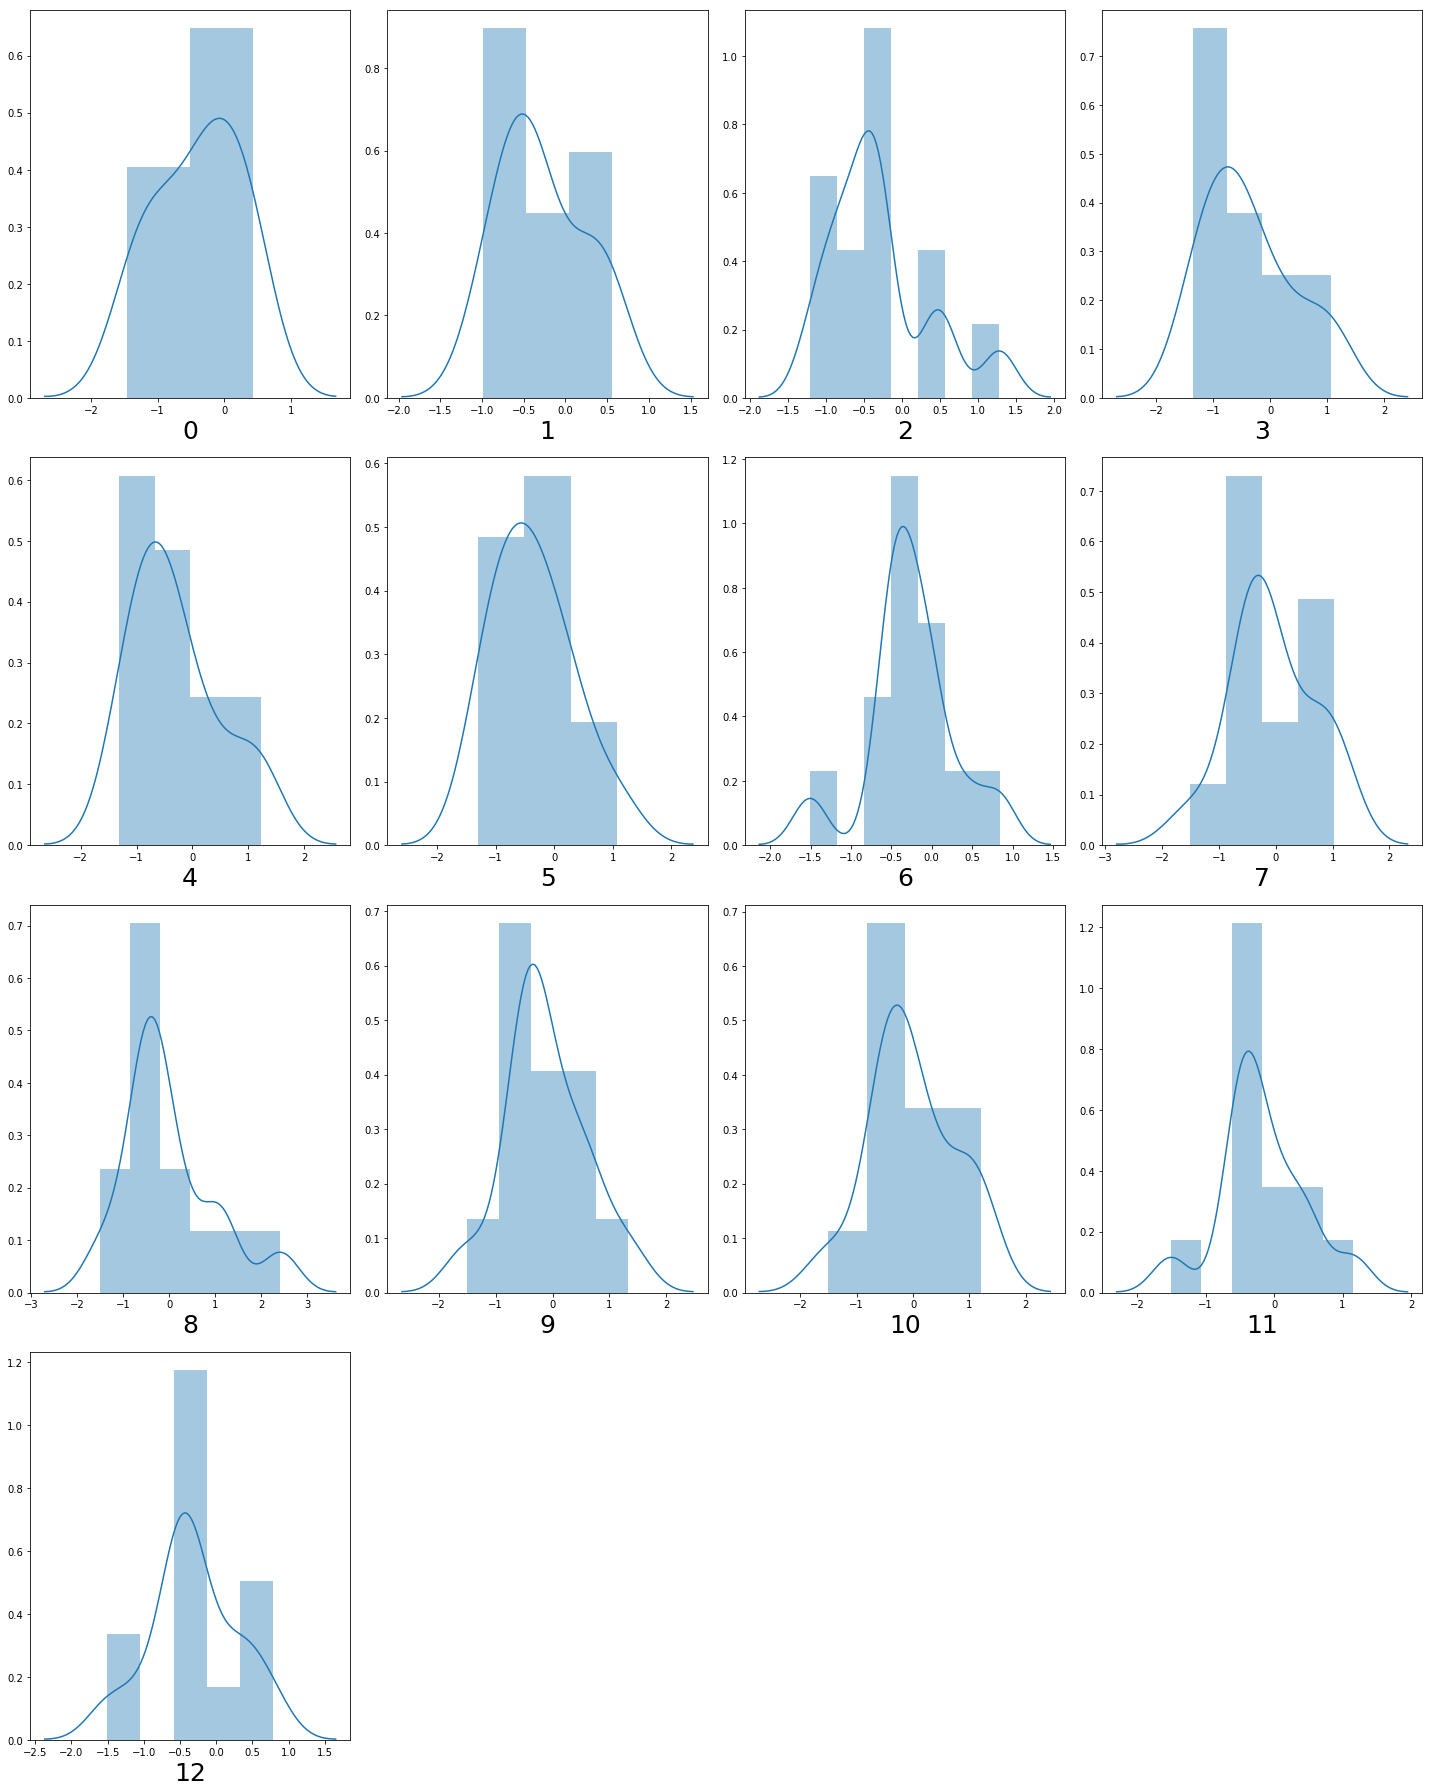

In [13]:
plt.figure(figsize=(20,25))
plotnumber=1
for i in range(13):
    if plotnumber<=13:
        ax=plt.subplot(4,4,plotnumber)
        sns.distplot(x_trans[i])
        plt.xlabel(i,fontsize=25)
    plotnumber+=1
plt.tight_layout()

In [14]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [15]:
vif=pd.DataFrame()
vif['VIF']=[variance_inflation_factor(x_trans,i) for i in range(x_trans.shape[1])]
vif['Features']=x.columns

In [16]:
vif

,VIF,Features
0,1.792192,CRIM
1,2.298758,ZN
2,3.991596,INDUS
3,1.073995,CHAS
4,4.393720,NOX
5,1.933744,RM
6,3.100826,AGE
7,3.955945,DIS
8,7.484496,RAD
9,9.008554,TAX


In [20]:
x=x.drop(['RAD','TAX'],axis=1)

In [21]:
x_trans=sc.fit_transform(x)


In [22]:
vif=pd.DataFrame()
vif['VIF']=[variance_inflation_factor(x_trans,i) for i in range (x_trans.shape[1])]
vif['Features']=x.columns

In [23]:
vif

,VIF,Features
0,1.478206,CRIM
1,2.154483,ZN
2,3.179166,INDUS
3,1.057805,CHAS
4,3.901348,NOX
5,1.872532,RM
6,3.075755,AGE
7,3.954443,DIS
8,1.496077,PTRATIO
9,1.316559,B


In [24]:
x_train,x_test,y_train,y_test=train_test_split(x_trans,y,test_size=0.25,random_state=355)

In [25]:
from sklearn.linear_model import LinearRegression

In [26]:
lr=LinearRegression()

In [27]:
lr.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [28]:
lin_reg_score_train=lr.score(x_train,y_train)
lin_reg_score_train

0.7221847012235341

In [29]:
def adj_r2(x,y,regression):
    r2=regression.score(x,y)
    n=x.shape[0]
    p=x.shape[1]
    adjusted_r2=1-(1-r2)*(n-1)/(n-p-1)
    return adjusted_r2

In [30]:
adj_r2(x_train,y_train,lr)

0.7138578121593893

In [31]:
lin_reg_score_test=lr.score(x_test,y_test)
lin_reg_score_test

0.7325448326094592

In [32]:
adj_r2(x_test,y_test,lr)

0.7069621644242771

In [33]:
from sklearn.linear_model import LassoCV

In [34]:
las_cv=LassoCV(alphas=None,cv=10,max_iter=10000,normalize=True)

In [35]:
las_cv.fit(x_train,y_train)

LassoCV(alphas=None, copy_X=True, cv=10, eps=0.001, fit_intercept=True,
    max_iter=10000, n_alphas=100, n_jobs=None, normalize=True,
    positive=False, precompute='auto', random_state=None,
    selection='cyclic', tol=0.0001, verbose=False)

In [50]:
las_cv.alphas_

array([0.33837643, 0.31557099, 0.29430256, 0.27446755, 0.25596936,
       0.23871788, 0.2226291 , 0.20762464, 0.19363143, 0.18058132,
       0.16841075, 0.15706043, 0.14647508, 0.13660315, 0.12739655,
       0.11881045, 0.11080303, 0.10333527, 0.09637082, 0.08987575,
       0.08381843, 0.07816934, 0.07290099, 0.06798771, 0.06340556,
       0.05913224, 0.05514693, 0.05143021, 0.04796398, 0.04473137,
       0.04171663, 0.03890507, 0.036283  , 0.03383764, 0.0315571 ,
       0.02943026, 0.02744676, 0.02559694, 0.02387179, 0.02226291,
       0.02076246, 0.01936314, 0.01805813, 0.01684107, 0.01570604,
       0.01464751, 0.01366031, 0.01273966, 0.01188105, 0.0110803 ,
       0.01033353, 0.00963708, 0.00898758, 0.00838184, 0.00781693,
       0.0072901 , 0.00679877, 0.00634056, 0.00591322, 0.00551469,
       0.00514302, 0.0047964 , 0.00447314, 0.00417166, 0.00389051,
       0.0036283 , 0.00338376, 0.00315571, 0.00294303, 0.00274468,
       0.00255969, 0.00238718, 0.00222629, 0.00207625, 0.00193

In [52]:
las_cv.coef_

array([-0.31953465,  0.73479172, -0.4194293 ,  0.94568598, -1.37507015,
        3.27607501, -0.17531758, -2.26922641, -1.65586462,  0.62085794,
       -2.99886841])

In [53]:
lr.coef_

array([-0.44844084,  1.05217386, -0.58045169,  1.07065506, -1.63689397,
        3.2846196 , -0.53018666, -3.20142755, -1.63652242,  0.68495411,
       -2.90424329])

In [55]:
alpha=las_cv.alpha_
alpha

0.005913224207167832

In [36]:
lasso_reg_score_test=las_cv.score(x_test,y_test)
lasso_reg_score_test

0.7334536996636629

In [57]:
from sklearn.linear_model import RidgeCV

In [62]:
alphas=np.random.uniform(low=0,high=10,size=(50,))
ridgecv=RidgeCV(alphas=alphas,cv=10,normalize=True)
ridgecv.fit(x_train,y_train)

C:\Users\user\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


RidgeCV(alphas=array([3.3493 , 4.38391, 8.48736, 0.77386, 1.35148, 9.07191, 3.48903,
       2.15785, 6.21504, 6.04166, 9.61339, 2.43401, 2.00541, 1.22568,
       5.28839, 0.3708 , 8.87855, 6.8535 , 9.75197, 0.71529, 5.77873,
       2.43583, 0.15319, 8.83962, 3.94762, 1.37692, 1.12904, 0.37629,
       4.2406...162, 0.4455 ,
       9.14899, 5.23187, 0.45507, 2.62484, 1.39758, 7.26306, 6.65775,
       5.0806 ]),
    cv=10, fit_intercept=True, gcv_mode=None, normalize=True, scoring=None,
    store_cv_values=False)

In [64]:
ridgecv.alpha_

0.15319181849956398

In [66]:
ridge_reg_score_train=ridgecv.score(x_train,y_train)
ridge_reg_score_train

0.7129010676535563

In [68]:
ridge_reg_score_test=ridgecv.score(x_test,y_test)
ridge_reg_score_test

0.7168087778162202

In [69]:
from sklearn.linear_model import ElasticNetCV

In [70]:
elasticnetcv=ElasticNetCV(alphas=None,cv=10)
elasticnetcv.fit(x_train,y_train)

ElasticNetCV(alphas=None, copy_X=True, cv=10, eps=0.001, fit_intercept=True,
       l1_ratio=0.5, max_iter=1000, n_alphas=100, n_jobs=None,
       normalize=False, positive=False, precompute='auto',
       random_state=None, selection='cyclic', tol=0.0001, verbose=0)

In [71]:
elasticnetcv.coef_

array([-0.41256588,  0.80925067, -0.55935083,  1.00133046, -1.28691258,
        3.24479836, -0.34589213, -2.39418327, -1.61491085,  0.6768723 ,
       -2.82510704])

In [72]:
elasticnetcv.alpha_

0.08122804400292312

In [73]:
elasticnet_score_train=elasticnetcv.score(x_train,y_train)
elasticnet_score_train

0.7197325406669517

In [74]:
elasticnet_score_test=elasticnetcv.score(x_test,y_test)
elasticnet_score_test

0.7295309009805893

In [78]:
print("Training score of the model without regularisation : ",lin_reg_score_train*100)
print("Test score of the model without regularisation :     ",lin_reg_score_test*100)

print("Test score of the model with Lasso regression :      ",lasso_reg_score_test*100)
print("Training score of the model with Ridge Regression :  ",ridge_reg_score_train*100)
print("Test score of the model with Ridge Regression :      ",ridge_reg_score_test*100)
print("Training score of the model with ElasticNet Regression : ",elasticnet_score_train*100)
print("Test score of the model with ElasticNet Regression :     ",elasticnet_score_test*100)

Training score of the model without regularisation :  72.21847012235341
Test score of the model without regularisation :      73.25448326094592
Test score of the model with Lasso regression :       73.34536996636629
Training score of the model with Ridge Regression :   71.29010676535563
Test score of the model with Ridge Regression :       71.68087778162202
Training score of the model with ElasticNet Regression :  71.97325406669518
Test score of the model with ElasticNet Regression :      72.95309009805892


Even after using different types of regularisation techniques we are getting the same r2 score approximately, Hence we can conclude that our model is not overfitted.

In [37]:
import pickle

In [40]:
#saving the model to the local file system
filename='Linear_model.pickle'
pickle.dump(lr,open(filename,'wb'))